In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
import os

In [4]:
tokenizer = Tokenizer()

data_loc = os.getcwd() + '/sonnet.txt'

data = open(data_loc).read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           385600    
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1928)              194728    
_________________________________________________________________
dense_1 (Dense)              (None, 3856)              7438224   
Total params: 8,480,152
Trainable params: 8,480,152
Non-trainable params: 0
______________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
574/574 [==============================] - 89s 156ms/step - loss: 6.9534 - accuracy: 0.0241
Epoch 2/100
574/574 [==============================] - 89s 154ms/step - loss: 6.5764 - accuracy: 0.0267
Epoch 3/100
574/574 [==============================] - 87s 151ms/step - loss: 6.4588 - accuracy: 0.0341
Epoch 4/100
574/574 [==============================] - 88s 154ms/step - loss: 6.3167 - accuracy: 0.0445
Epoch 5/100
574/574 [==============================] - 89s 155ms/step - loss: 6.2145 - accuracy: 0.0468
Epoch 6/100
574/574 [==============================] - 90s 156ms/step - loss: 6.1313 - accuracy: 0.0507
Epoch 7/100
574/574 [==============================] - 89s 154ms/step - loss: 6.0513 - accuracy: 0.0549s - l
Epoch 8/100
574/574 [==============================] - 89s 155ms/step - loss: 5.9787 - accuracy: 0.0572
Epoch 9/100
574/574 [==============================] - 91s 159ms/step - loss: 5.8962 - accuracy: 0.0636
Epoch 10/100
574/574 [==============================] - 92s

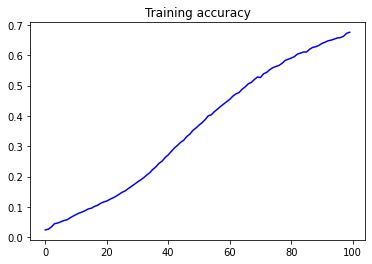

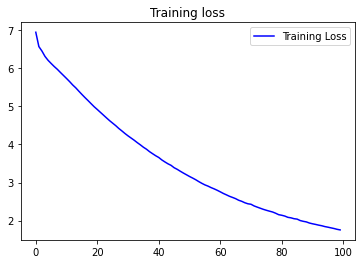

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope which nimble matter would hap to his body's treason payments of warranty 1041 zip fired fangled by the widest variety gutenberg store barren pride refined pen will good including end sweet heart feeding sweet truth dull new feeding life thee no every foundation you cannot dwell in altering deep shown more wished wide in this every foundation without any other and not better sweet deeds for this thee i say that my self respect spent fangled ill mine no well of one shakespeare's life and every foundation i see you have sweet self dull heart's praise in youth by literary
